# BIG MART sales data
## Problem statement:

The primary goal is to develop a predictive model to forecast the sales of 1559 products across 10 BigMart stores for the year 2013. This model aims to identify key factors influencing product sales at various stores, enabling BigMart to optimize product placements and store management strategies for maximum revenue.

## Challenges:

- Handling Missing Data: The dataset has incomplete information, requiring effective strategies for imputation or exclusion of missing values without compromising the integrity and representativeness of the data.
- Feature Engineering: Identifying and creating relevant features that significantly impact sales prediction. This involves understanding product and store attributes that might influence sales.
- Model Selection and Tuning: Choosing appropriate predictive models considering the nature of the data and fine-tuning them for optimal performance.

## Expected Outcomes:

A robust predictive model that accurately forecasts sales for each product in different stores.
Insights into the attributes of products and stores that are strong predictors of sales, providing strategic information for business decisions.
Recommendations for data collection and reporting improvements to address current data gaps.

## Benefits to BigMart:

Enhanced understanding of sales dynamics, leading to more informed business strategies.
Ability to target specific areas for product placement and marketing efforts.
Potential increase in overall sales and profitability by capitalizing on the insights provided by the model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
random.seed(365)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("/content/drive/MyDrive/internship/bigmart/Train.csv")

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Hypothesis generation

Top 10 Items Analysis:

Hypothesis: Certain items might be more prevalent in the dataset, potentially indicating higher popularity or sales. This could be seen in the bar graph for top 10 items by Item Identifier, Item Type, and Outlet Identifier.

Item Weight Distribution:

Hypothesis: The distribution of item weight might influence sales, with certain weight ranges being more popular among consumers.

Item Fat Content Standardization:

Hypothesis: The classification of fat content (e.g., Low Fat, Regular) might have an impact on sales, especially if consumer preferences are health-oriented.

Numerical Variables Distribution:

Hypothesis: The distribution of key numerical variables like item weight and item visibility might show patterns that are relevant for sales prediction.

Outlet Characteristics:

Hypothesis: The characteristics of outlets (such as size, location type, and establishment year) might significantly affect sales, with some types of outlets performing better than others.

Mean Visibility and MRP by Item Type:

Hypothesis: The average visibility and MRP (Maximum Retail Price) for each item type might correlate with sales, suggesting that certain item types are more successful due to pricing or shelf placement strategies.

Outlet Type and Item Type Relationship:

Hypothesis: There might be a significant relationship between the types of items sold and the types of outlets, indicating that certain outlets are better suited for selling specific categories of products.

Scatter Plots of Numerical Variables:

Hypothesis: Relationships between numerical variables like item weight, visibility, and MRP could reveal patterns, such as whether more expensive items are given more shelf visibility.

Box Plots of Categorical Variables:

Hypothesis: The distribution of sales across different categories (like fat content, item type, outlet size, etc.) could highlight which categories are more successful.

item visibility vs sales outcome?

Hypothesis: does item visibility increase in sale



## EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(8523, 12)

the dataframe has 11 features with 8523 item entries

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- item weight and outlet size has null values.
- item mrp has 4 digit float values we can round them up if needed for much clarity.
- outlet establishment year is in numerical format, we can try a specific model converting them to age (2023 - established year) and build a model. or we can also create categorical feature New' (less than 10 years old), 'Moderate' (10-20 years), and 'Old' (more than 20 years). This might help capture non-linear effects on sales.

## Univariate analysis

### item identifier column

In [9]:
#how many item indentifiers are present
df['Item_Identifier'].nunique()

1559

In [10]:
# Finding items that appear only once in the Item_Identifier column
unique_item_counts = df['Item_Identifier'].value_counts()
single_appearance_items = unique_item_counts[unique_item_counts == 1]

# Number of such unique items
num_single_appearance_items = single_appearance_items.count()
num_single_appearance_items, single_appearance_items.index.tolist()

(9,
 ['FDK57',
  'FDN52',
  'FDT35',
  'FDE52',
  'FDY43',
  'FDQ60',
  'FDO33',
  'DRF48',
  'FDC23'])

In [11]:
#finding out items that have been appearead the most
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

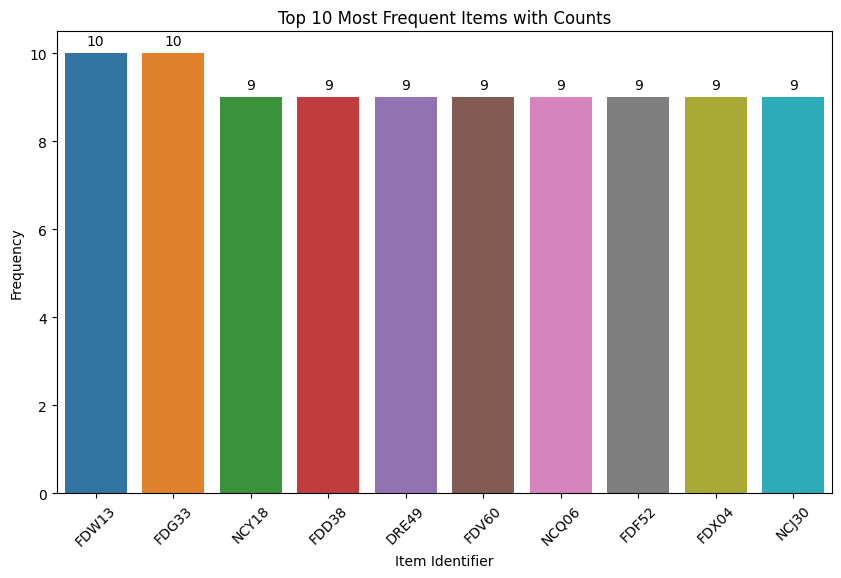

In [12]:
# Finding the top 10 items that appear the most in the Item_Identifier column
top_10_items = df['Item_Identifier'].value_counts().head(10)

# Creating a bar graph for the top 10 items with the sum displayed on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title('Top 10 Most Frequent Items with Counts')
plt.xlabel('Item Identifier')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()

<Axes: xlabel='Item_Weight', ylabel='Density'>

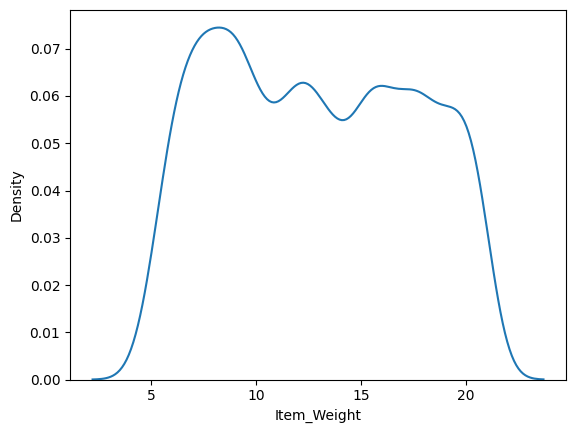

In [13]:
#Item_Weight
sns.kdeplot(data=df, x="Item_Weight")

- The distribution appears to be roughly symmetric, indicating a distribution that is close to normal.
- The skewness of the distribution is approximately 0.082, which is quite low. A skewness value closer to zero suggests a more symmetric distribution. In statistics, a skewness between -0.5 and 0.5 is generally considered to indicate a fairly symmetrical distribution.

Based on the density plot and the skewness value, the distribution of Item Weight can be described as approximately normal or Gaussian. This means most of the item weights are around the mean weight, with fewer items as the weight deviates farther from the mean

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF is also low fat reg is regular

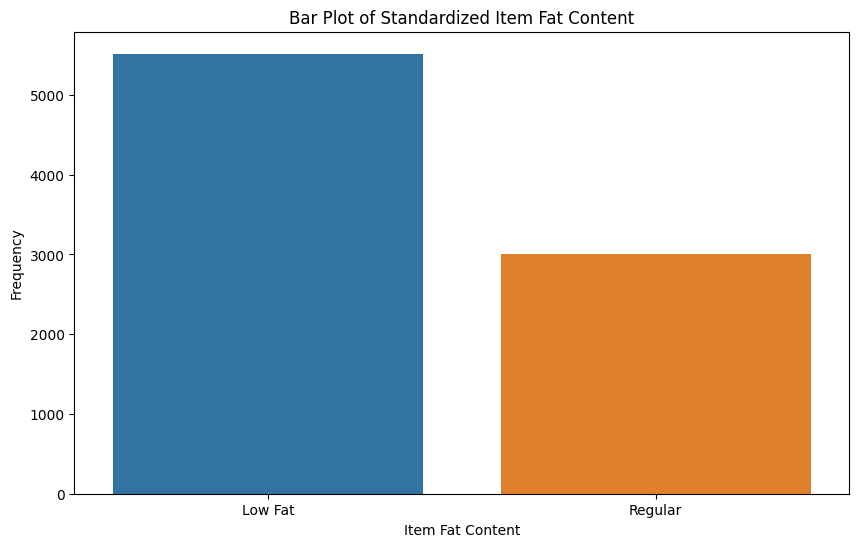

In [15]:
# Standardizing the variations in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

# Re-creating the bar plot for the standardized Item_Fat_Content
standardized_fat_content_counts = df['Item_Fat_Content'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=standardized_fat_content_counts.index, y=standardized_fat_content_counts.values)
plt.title('Bar Plot of Standardized Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Frequency')
plt.show()

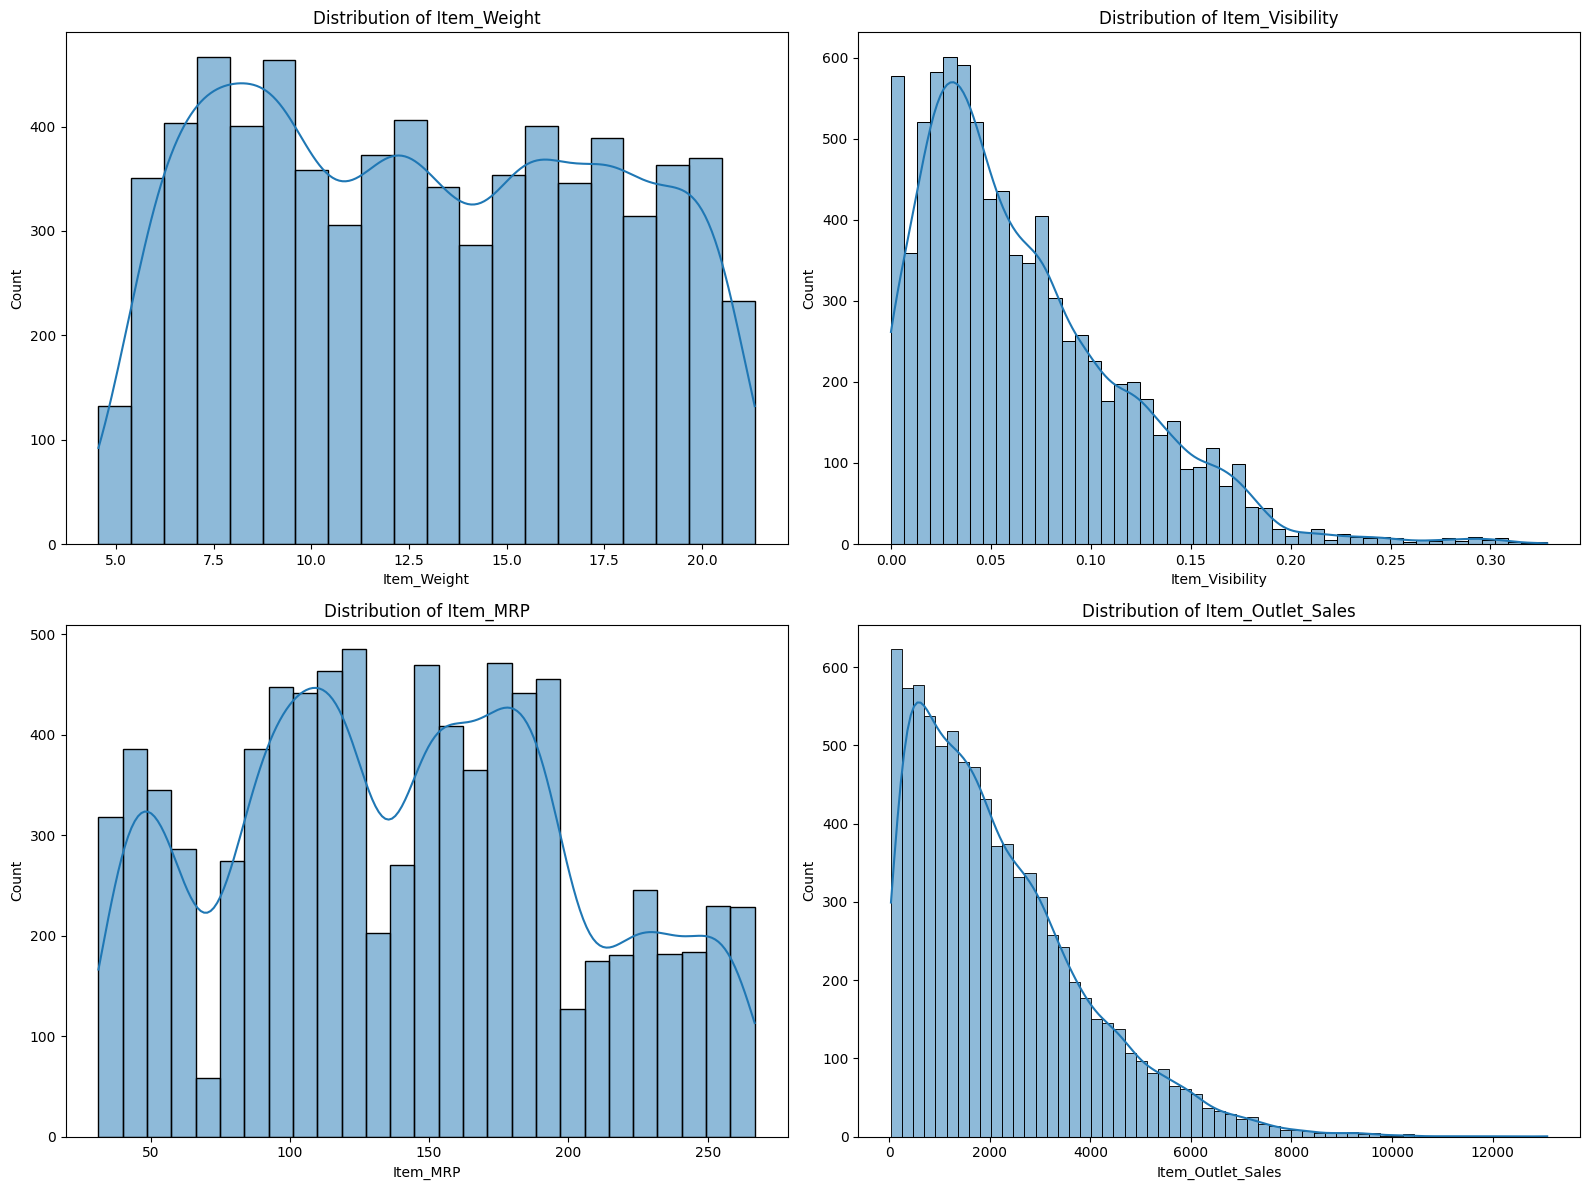

In [16]:
# Distribution of key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Item_Weight
sns.histplot(df['Item_Weight'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Item_Weight')

# Histogram for Item_Visibility
sns.histplot(df['Item_Visibility'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Item_Visibility')

# Histogram for Item_MRP
sns.histplot(df['Item_MRP'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Item_MRP')

# Histogram for Item_Outlet_Sales
sns.histplot(df['Item_Outlet_Sales'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Item_Outlet_Sales')

plt.tight_layout()
plt.show()

Item_Weight: The distribution seems fairly uniform, indicating a wide variety of product weights.

Item_Visibility: There's a spike at the lower end, including several items with near-zero visibility. This distribution is positively skewed. The histogram and density plot reveal that most items have low visibility values, with a long tail extending towards higher visibility values. This pattern suggests that while most products occupy a smaller share of the display area, a few items have significantly higher visibility.

- Interpretation: In a retail context, this distribution might imply that a majority of products are given limited shelf space or are less prominently displayed. A smaller number of items may be more prominently displayed, possibly due to factors like higher demand, promotional strategies, or vendor agreements.

Item_MRP: The distribution of the Maximum Retail Price (MRP) shows multiple peaks, suggesting different price ranges for distinct categories of products.

Item_Outlet_Sales: Sales distribution is positively skewed, indicating that a large number of products have low sales figures, while a few have very high sales.

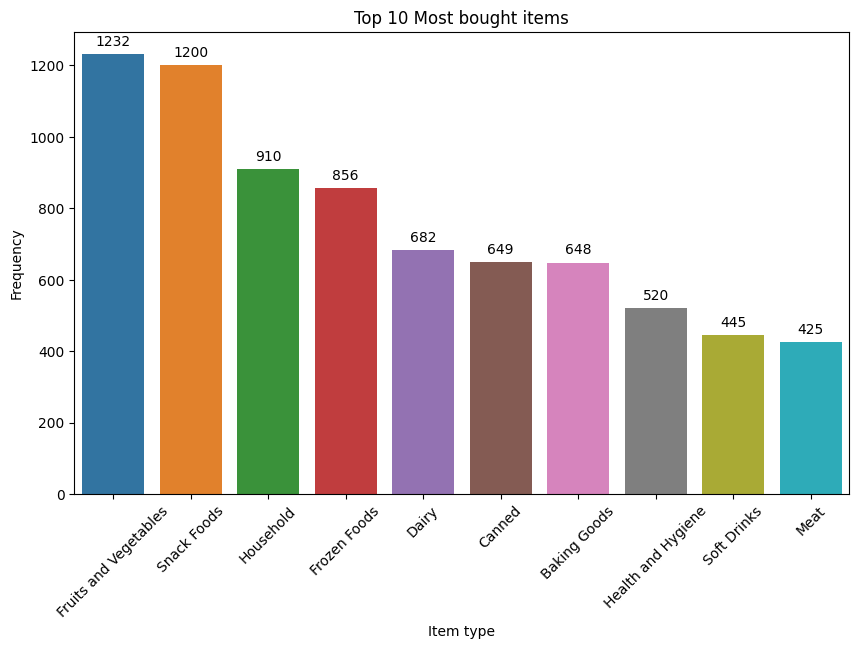

In [8]:
# Finding the top 10 items that appear the most item type
top_10_items = df['Item_Type'].value_counts().head(10)

# Creating a bar graph for the top 10 items with the sum displayed on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title('Top 10 Most bought items')
plt.xlabel('Item type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

In [18]:
#finding out items that have been appearead the most
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

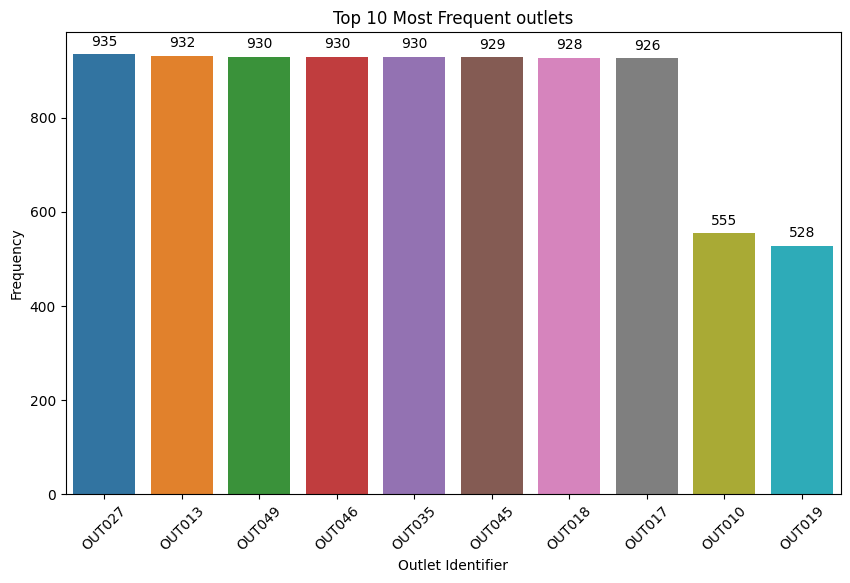

In [9]:
# Finding the top 10 outlet identifiers
top_10_items = df['Outlet_Identifier'].value_counts().head(10)

# Creating a bar graph for the top 10 items with the sum displayed on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title('Top 10 Most Frequent outlets')
plt.xlabel('Outlet Identifier')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

In [20]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

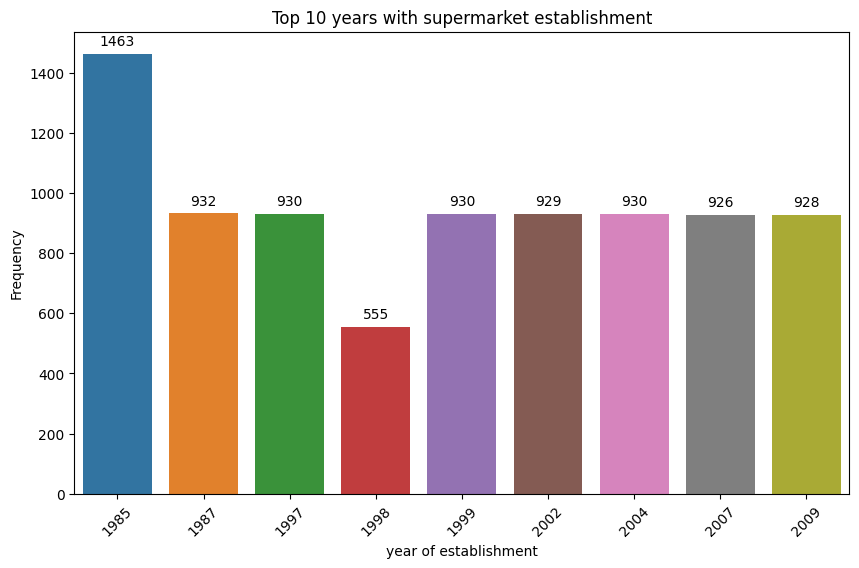

In [10]:
# Finding the top 10 established year
top_10_items = df['Outlet_Establishment_Year'].value_counts()

# Creating a bar graph for the top 10 items with the sum displayed on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title('Top 10 years with supermarket establishment')
plt.xlabel('year of establishment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

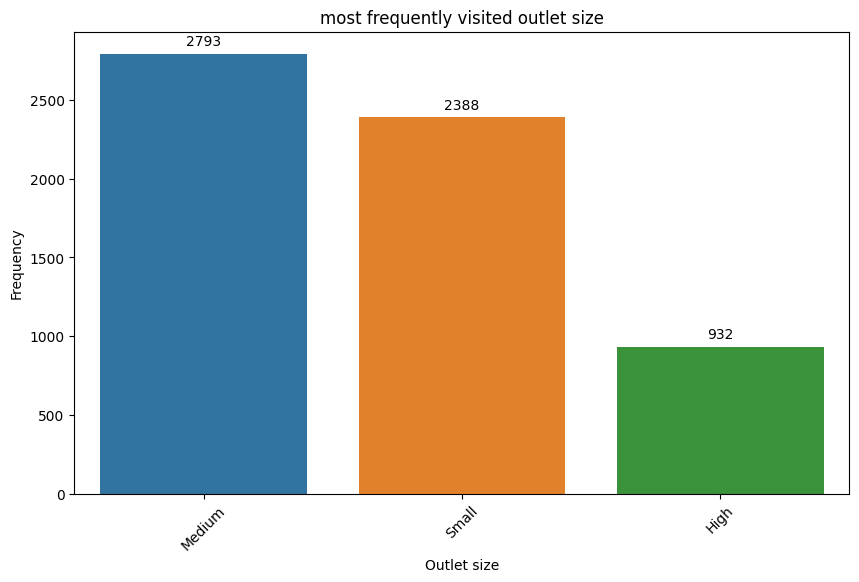

In [11]:
outletsize = df['Outlet_Size'].value_counts()


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=outletsize.index, y=outletsize.values)
plt.title('most frequently visited outlet size')
plt.xlabel('Outlet size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

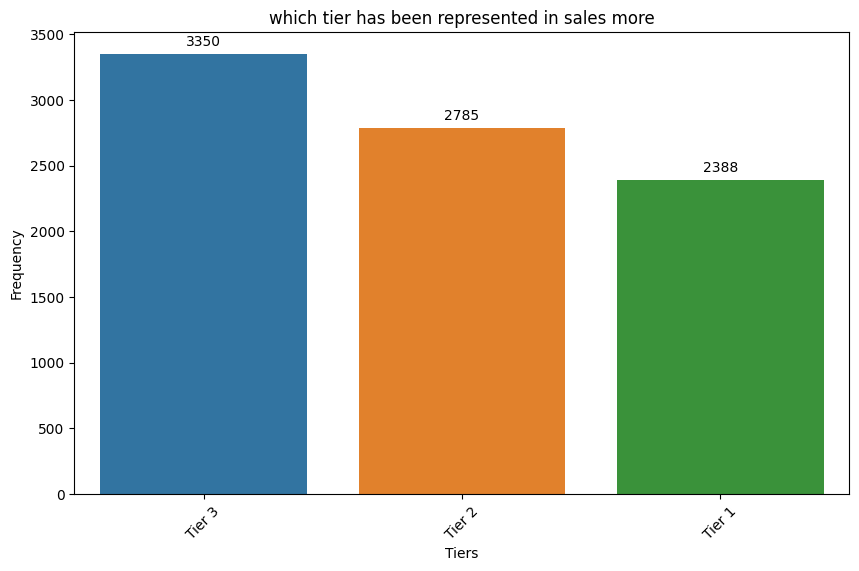

In [12]:
tiers = df['Outlet_Location_Type'].value_counts()

# Creating a bar graph for the top 10 items with the sum displayed on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=tiers.index, y=tiers.values)
plt.title('which tier has been represented in sales more')
plt.xlabel('Tiers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

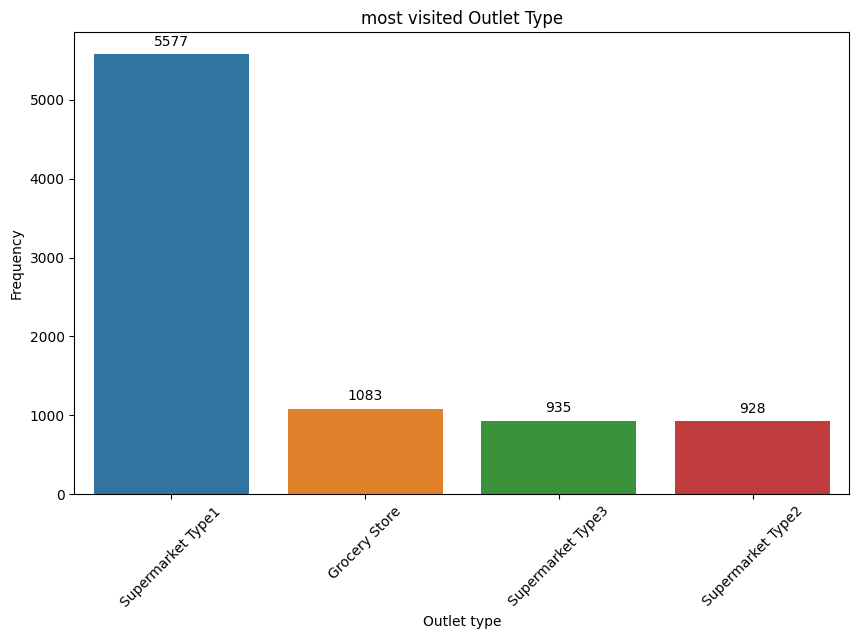

In [13]:
outlettype=df['Outlet_Type'].value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=outlettype.index, y=outlettype.values)
plt.title('most visited Outlet Type')
plt.xlabel('Outlet type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding the sum on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

In [25]:
# Creating a cross-tabulation of Outlet_Location_Type and Outlet_Type
outlet_relation = pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Type'])

outlet_relation

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


From this, we can infer that there is indeed a relationship between the outlet location type and outlet type. For instance, "Supermarket Type2" and "Supermarket Type3" are only found in Tier 3 locations, while Tier 2 locations exclusively feature "Supermarket Type1". This suggests that the choice of outlet type may be influenced by the location type, possibly due to factors like market size, customer demographics, or regional preferences. ​

In [26]:
# Creating a cross-tabulation of Item_Fat_Content and Item_Type
fat_content_item_type_relation = pd.crosstab(df['Item_Fat_Content'], df['Item_Type'])

fat_content_item_type_relation

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


From the table we can observe

Fruits and Vegetables:

There are significant counts under both "Low Fat" and "Regular". This is unusual since fruits and vegetables are typically not classified by fat content.
Other Categories:

- Categories like "Health and Hygiene" and "Household" also have entries under "Low Fat" and no entries under "Regular". These categories generally wouldn't have a fat content classification.
- "Hard Drinks" are listed under "Low Fat" but not under "Regular", which is also inconsistent as these drinks usually don't have fat content considerations.
These observations suggest that there might be inconsistencies or misclassifications in the dataset.

In real-world data, such issues are not uncommon and can arise from various factors such as data entry errors or misinterpretation of categories.

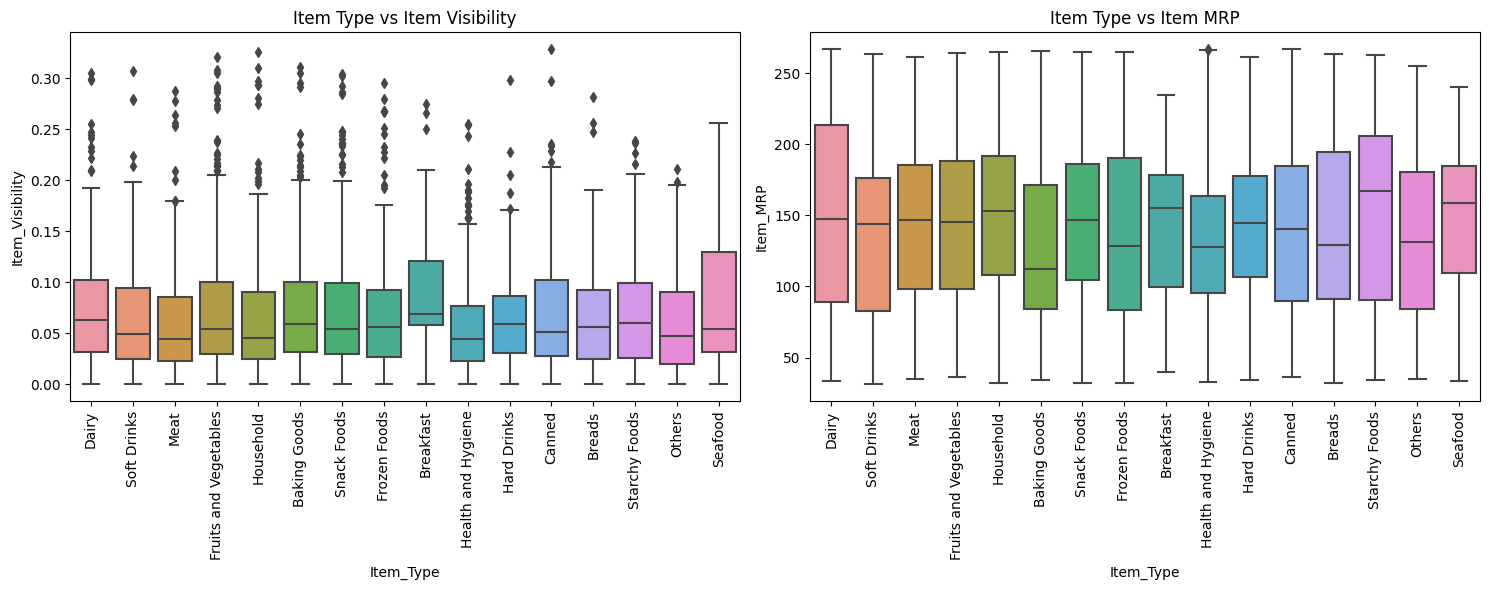

(Item_Type
 Baking Goods             0.069169
 Breads                   0.066255
 Breakfast                0.085723
 Canned                   0.068129
 Dairy                    0.072427
 Frozen Foods             0.065645
 Fruits and Vegetables    0.068513
 Hard Drinks              0.064943
 Health and Hygiene       0.055216
 Household                0.061322
 Meat                     0.062284
 Others                   0.060241
 Seafood                  0.074976
 Snack Foods              0.066850
 Soft Drinks              0.063972
 Starchy Foods            0.067564
 Name: Item_Visibility, dtype: float64,
 Item_Type
 Baking Goods             126.380766
 Breads                   140.952669
 Breakfast                141.788151
 Canned                   139.763832
 Dairy                    148.499208
 Frozen Foods             138.503366
 Fruits and Vegetables    144.581235
 Hard Drinks              137.077928
 Health and Hygiene       130.818921
 Household                149.424753
 Meat   

In [27]:
# Calculating mean visibility for each item type
mean_visibility_by_item_type = df.groupby('Item_Type')['Item_Visibility'].mean()

# Calculating mean MRP for each item type
mean_mrp_by_item_type = df.groupby('Item_Type')['Item_MRP'].mean()

# Creating boxplots for visualization
plt.figure(figsize=(15, 6))

# Boxplot for Item Type and Item Visibility
plt.subplot(1, 2, 1)
sns.boxplot(x='Item_Type', y='Item_Visibility', data=df)
plt.title('Item Type vs Item Visibility')
plt.xticks(rotation=90)

# Boxplot for Item Type and Item MRP
plt.subplot(1, 2, 2)
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.title('Item Type vs Item MRP')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

mean_visibility_by_item_type, mean_mrp_by_item_type

The analysis yields the following insights:

Item Type vs Item Visibility:

The boxplot shows the spread of item visibility across different item types.
The mean visibility varies slightly between item types, with some like "Breakfast" and "Seafood" having slightly higher average visibility, while others like "Health and Hygiene" have lower average visibility.

Item Type vs Item MRP:

The boxplot for Item MRP shows the variation in price ranges among different item types.
The average MRP also varies significantly between item types. For instance, "Household" and "Dairy" products tend to have higher average MRPs, while "Health and Hygiene" and "Soft Drinks" have lower average MRPs.

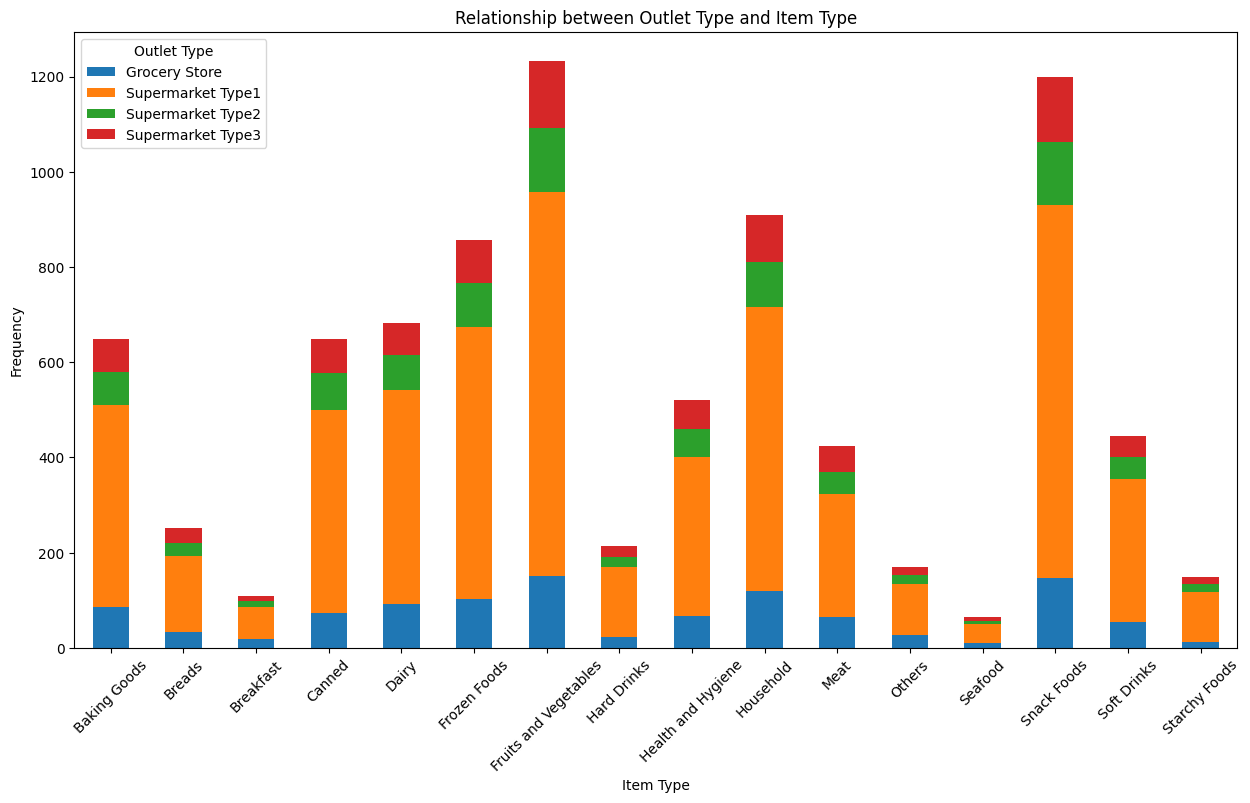

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,85,426,68,69
Breads,33,160,27,31
Breakfast,19,68,12,11
Canned,73,426,78,72
Dairy,92,450,73,67
Frozen Foods,103,572,92,89
Fruits and Vegetables,152,805,135,140
Hard Drinks,24,145,22,23
Health and Hygiene,67,335,58,60


In [28]:
# Creating a cross-tabulation of Outlet_Type and Item_Type
item_type_outlet_type_relation = pd.crosstab(df['Item_Type'], df['Outlet_Type'])

# Visualizing the relationship with a stacked bar chart
item_type_outlet_type_relation.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Relationship between Outlet Type and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Outlet Type')
plt.show()

item_type_outlet_type_relation

Key Observations:

Grocery Store:

All item types are present, but in smaller quantities compared to supermarkets.
This might be due to the limited space and range in grocery stores.

Supermarket Type1:

This type of outlet has a higher count of almost all item types, reflecting a larger inventory.

Supermarket Type2 and Type3:

These also stock all item types but in varying quantities.
Their distribution pattern is somewhat similar, but Type1 supermarkets generally have more items.

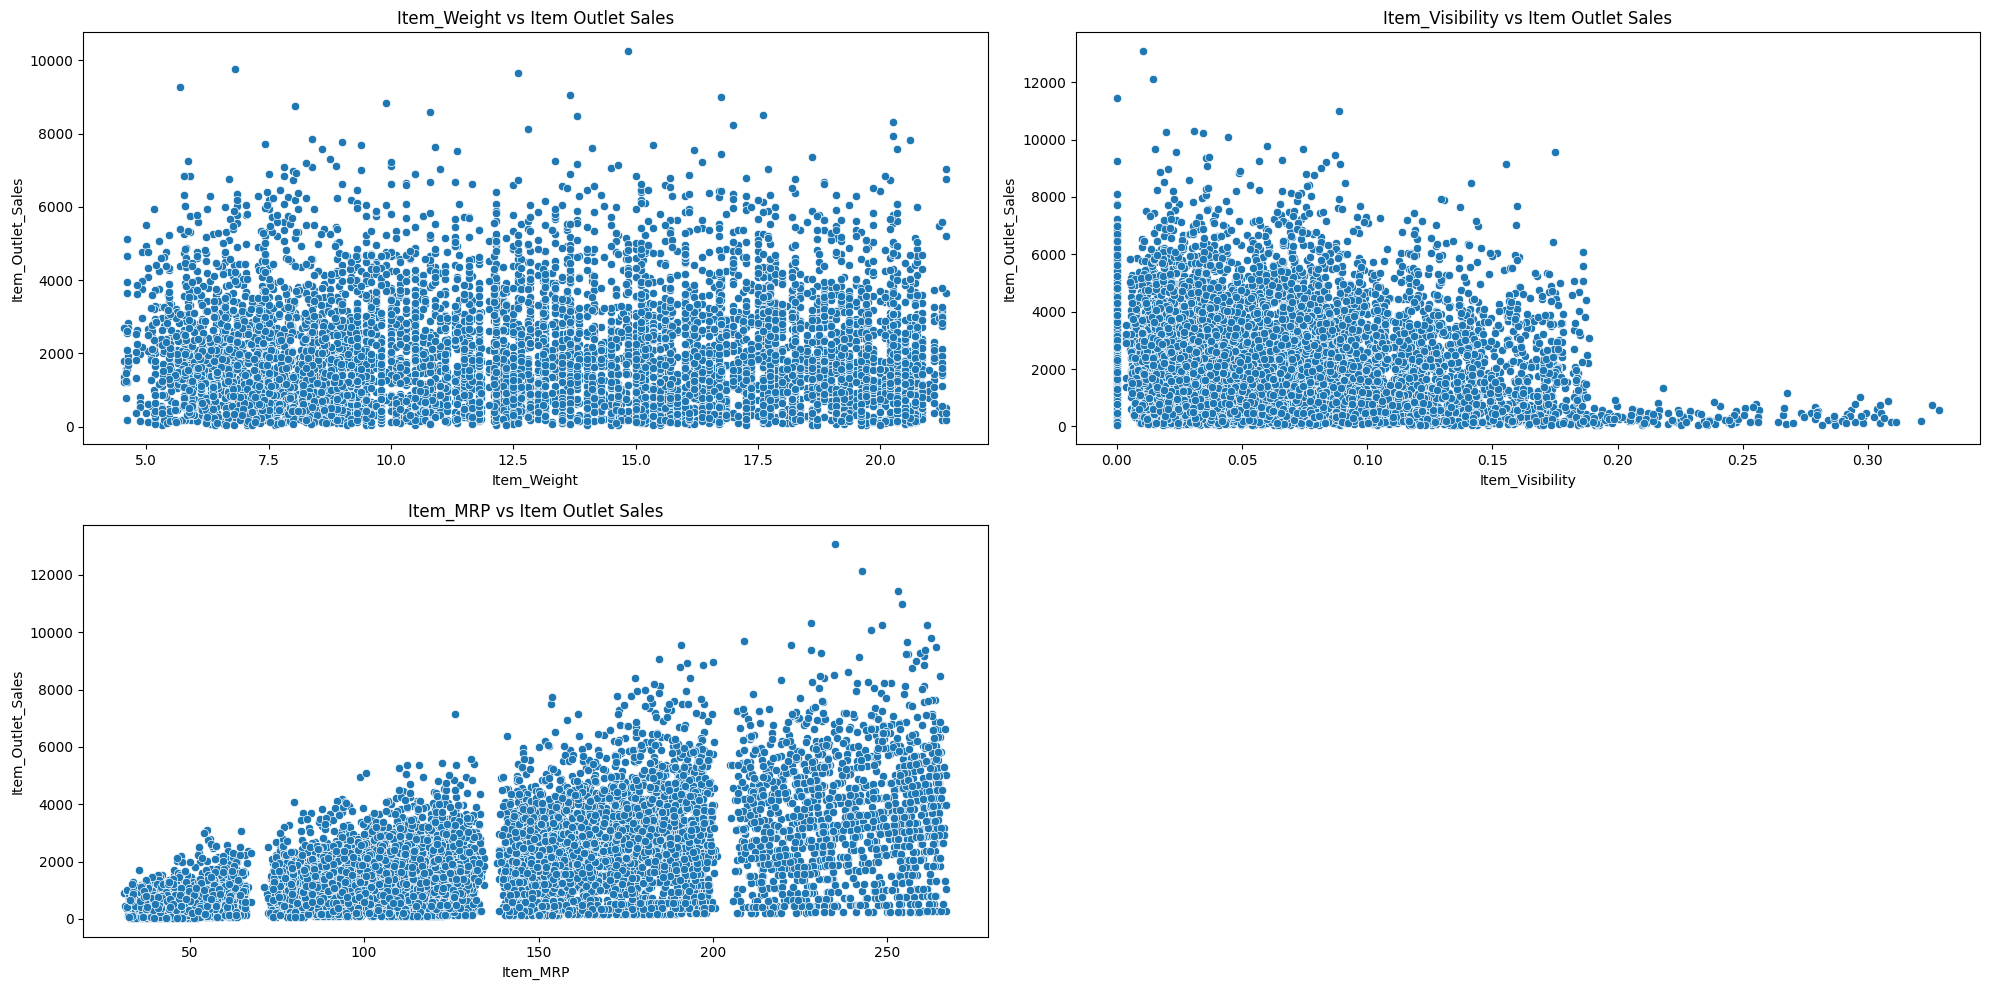

In [29]:
# Selecting the numerical columns for the scatter plots
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Creating scatter plots
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='Item_Outlet_Sales', data=df)
    plt.title(f'{col} vs Item Outlet Sales')

plt.tight_layout()
plt.show()

Item Weight vs Item Outlet Sales:

There doesn't appear to be a clear relationship or trend between Item_Weight and Item_Outlet_Sales. The plot shows a fairly even distribution without any noticeable pattern.

Item Visibility vs Item Outlet Sales:

The plot indicates a scattered distribution. Interestingly, higher sales seem to occur at lower visibility levels, which might be counterintuitive or it might say lower visibile items have high number of unit sales thus contributing to . However, there's no strong linear pattern.

Item MRP vs Item Outlet Sales:

This plot shows a more discernible pattern, with higher Item_MRP tending to have higher sales. This suggests a positive relationship, where more expensive items might be associated with higher sales.

Outlet Establishment Year vs Item Outlet Sales:

The relationship between the year of establishment and sales is not very clear from the plot. There doesn't seem to be a direct correlation between how old an outlet is and its sales performance.

In [30]:
#the scatter plot showed higher sales occur at lower visibility levels. reconfirming it

# Categorizing Item_Visibility into low, medium, and high
visibility_bins = pd.qcut(df['Item_Visibility'], q=[0, .33, .66, 1], labels=['Low', 'Medium', 'High'])

# Adding the categorized visibility to the dataframe
df['Visibility_Level'] = visibility_bins

# Calculating average sales for each visibility level
average_sales_per_visibility = df.groupby('Visibility_Level')['Item_Outlet_Sales'].mean()

average_sales_per_visibility

Visibility_Level
Low       2328.303783
Medium    2223.966932
High      1997.138551
Name: Item_Outlet_Sales, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Visibility_Level           8523 non-null   category
dtypes: category(1), float64(4), int64

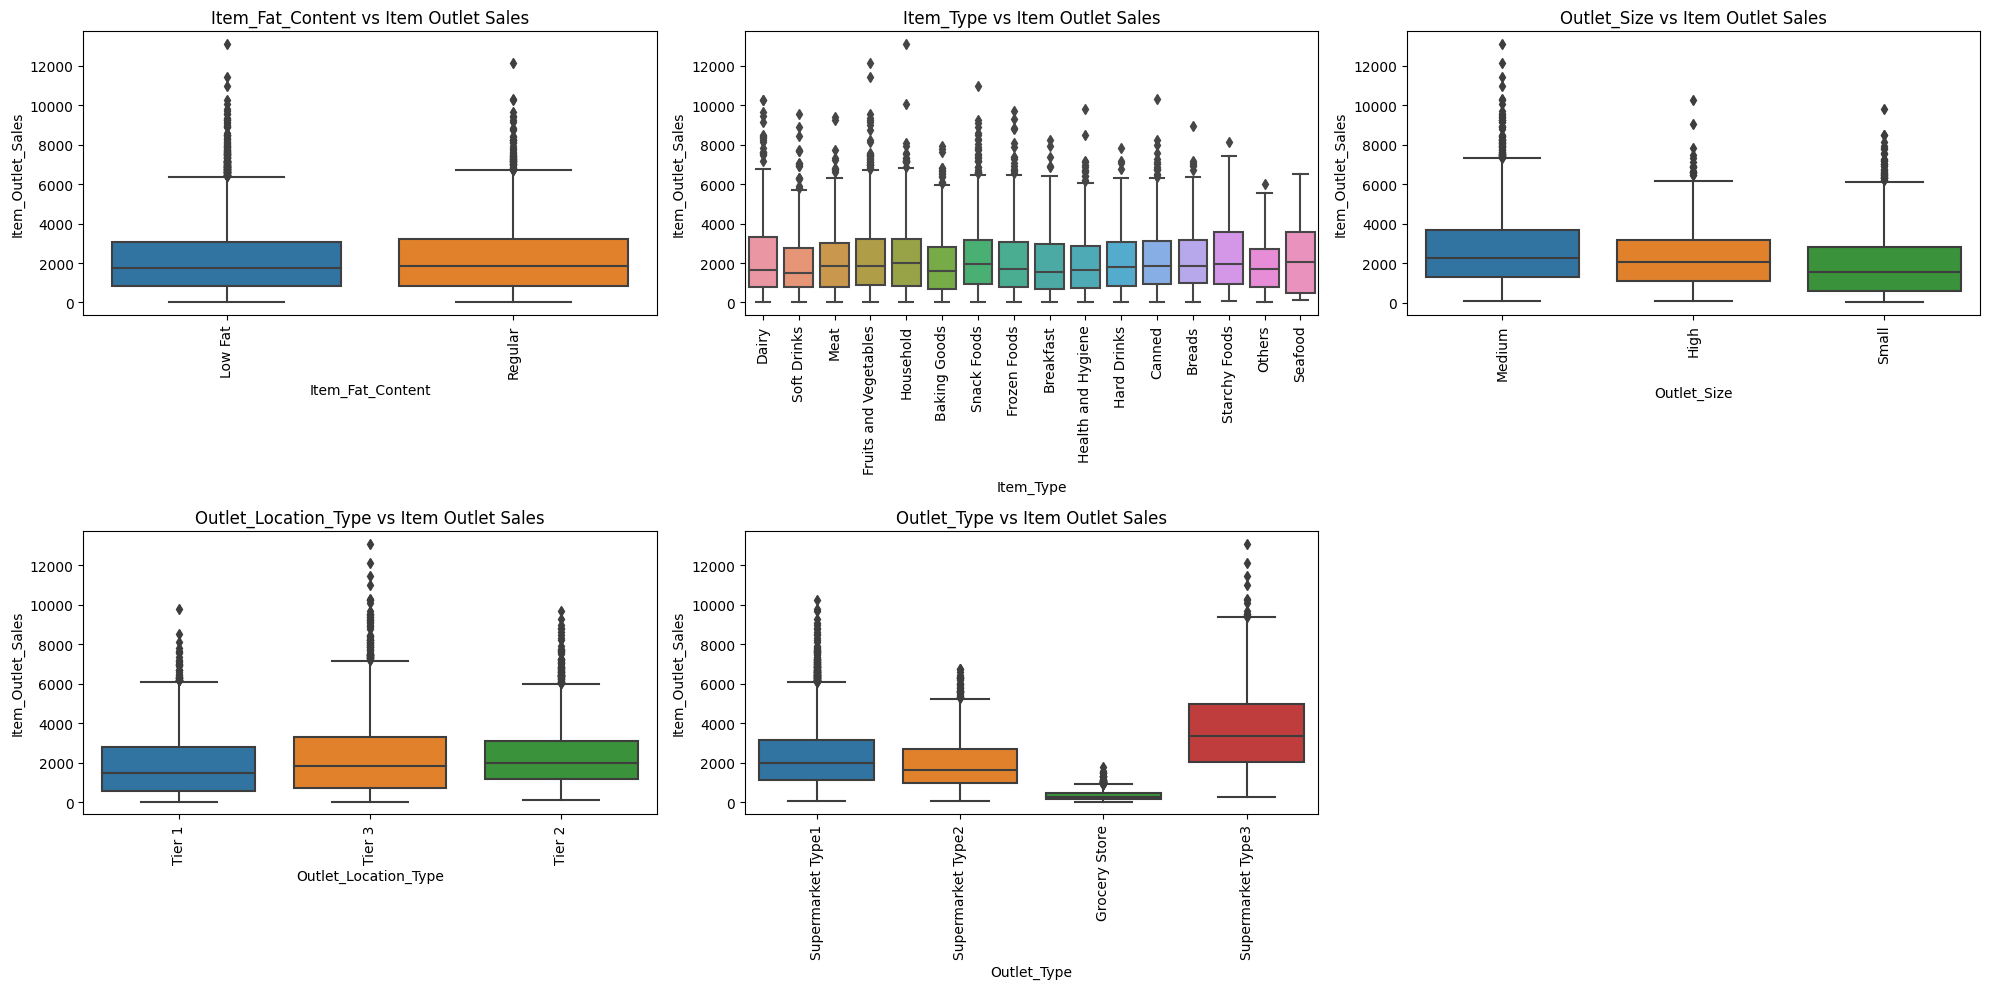

In [32]:
# Adjusting the list of categorical columns for manageable visualization
adjusted_categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size',
                                'Outlet_Location_Type', 'Outlet_Type']

# Creating box plots for these variables
plt.figure(figsize=(20, 10))

for i, col in enumerate(adjusted_categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=col, y='Item_Outlet_Sales', data=df)
    plt.title(f'{col} vs Item Outlet Sales')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1. Item Fat Content vs Item Outlet Sales
Similar Sales Distribution: The sales distribution for different fat contents ('Low Fat' and 'Regular') appears quite similar. There isn't a significant difference in the median sales, suggesting that fat content might not be a major factor in influencing sales.
2. Item Type vs Item Outlet Sales
Variability Across Types: Different item types show varying sales performance. Some, like 'Starchy Foods' and 'Seafood', have higher median sales but also a wider spread, indicating variability. Others, like 'Baking Goods' and 'Soft Drinks', have lower median sales.
Range and Outliers: The range of sales and the presence of outliers vary by item type, reflecting the differences in popularity and demand across categories.
3. Outlet Size vs Item Outlet Sales
Influence of Outlet Size: There's a noticeable difference in sales based on the outlet size. Medium-sized outlets tend to have higher median sales compared to small and high-sized outlets.
Sales Consistency: Larger outlets (marked as 'High') show a more consistent range of sales (narrower box), while medium outlets have a wider range, indicating variability in sales performance.
4. Outlet Location Type vs Item Outlet Sales
Location Impact: Sales vary significantly across outlet location types. Outlets in Tier 2 cities show the highest median sales, followed by Tier 3 and Tier 1. This could be due to factors like market size, customer demographics, and competition.
5. Outlet Type vs Item Outlet Sales
Strong Influence of Outlet Type: Different outlet types have distinctly different sales patterns. 'Supermarket Type3' shows notably higher sales, while 'Grocery Store' has much lower sales. This highlights the importance of the type of outlet in determining sales performance.
Overall Interpretation
The sales performance is influenced by the type of product and the characteristics of the outlet. While some product types are universally popular, others may depend more on the specific outlet's customer base and location.
Outlet characteristics like size, location type, and outlet type play significant roles in sales, suggesting the importance of strategic location selection and outlet management in driving sales.

## Feature engineering

In [33]:
# Creating an 'Age' column by subtracting the Outlet_Establishment_Year from 2023
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']

# Displaying the first few rows to confirm the addition of the Age column
df[['Outlet_Establishment_Year', 'Outlet_Age']].head()

,Outlet_Establishment_Year,Outlet_Age
0,1999,24
1,2009,14
2,1999,24
3,1998,25
4,1987,36


### outlier analysis

In [34]:
# Identifying numerical columns except 'Outlet_Establishment_Year', 'Outlet_Age', and the target variable 'Item_Outlet_Sales'
numerical_cols = df.select_dtypes(include=['number']).columns
cols_to_check = numerical_cols.drop(['Outlet_Establishment_Year', 'Outlet_Age', 'Item_Outlet_Sales'])

# Function to find outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Finding outliers for each column
outliers_dict = {}
for col in cols_to_check:
    outliers = find_outliers(df, col)
    outliers_dict[col] = outliers

# Displaying the number of outliers found in each column
outlier_counts = {col: len(outliers_dict[col]) for col in outliers_dict}
outlier_counts

{'Item_Weight': 0, 'Item_Visibility': 144, 'Item_MRP': 0}

In [35]:
# Extracting the outliers for Item_Visibility
item_visibility_outliers = outliers_dict['Item_Visibility']

item_visibility_outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Level,Outlet_Age
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,High,38
83,NCL18,NaN,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408,High,38
108,DRE60,NaN,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160,High,38
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502,High,25
334,FDC41,NaN,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010,High,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,NaN,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928,High,38
8345,FDY28,NaN,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654,High,38
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924,High,25
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920,High,25


In [36]:
item_types_outliers = item_visibility_outliers['Item_Type'].value_counts()

item_types_outliers

Fruits and Vegetables    24
Snack Foods              19
Baking Goods             17
Household                13
Dairy                    12
Frozen Foods             11
Canned                   11
Meat                      7
Soft Drinks               6
Starchy Foods             5
Health and Hygiene        4
Breakfast                 4
Hard Drinks               3
Breads                    3
Seafood                   3
Others                    2
Name: Item_Type, dtype: int64

In [37]:
fat_content_distribution = item_visibility_outliers['Item_Fat_Content'].value_counts()
fat_content_distribution

Low Fat    85
Regular    59
Name: Item_Fat_Content, dtype: int64

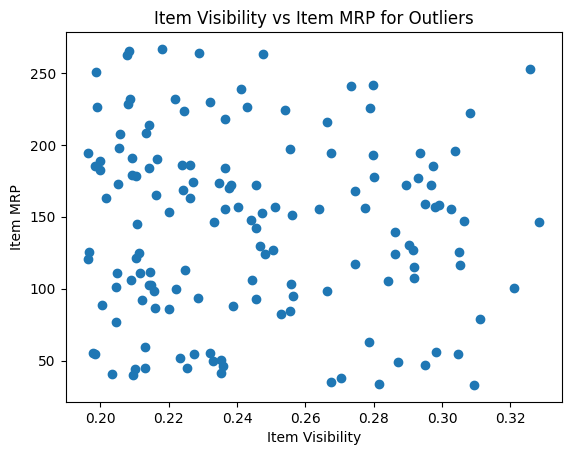

In [38]:
# Plotting the relationship between Item Visibility and Item MRP among outliers
plt.scatter(item_visibility_outliers['Item_Visibility'], item_visibility_outliers['Item_MRP'])
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.title('Item Visibility vs Item MRP for Outliers')
plt.show()

In [39]:
outlet_characteristics = item_visibility_outliers[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].value_counts()
outlet_characteristics

Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  
OUT019             Small        Tier 1                Grocery Store    77
dtype: int64

In [40]:
item_identifier_counts = item_visibility_outliers['Item_Identifier'].value_counts()
item_identifier_counts

FDS13    2
FDK08    2
FDP27    2
DRA59    2
FDY32    2
        ..
FDL16    1
DRE27    1
FDC45    1
FDH33    1
FDG45    1
Name: Item_Identifier, Length: 124, dtype: int64

Based on the outputs here are some insights:

Item Visibility vs. Item MRP Scatter Plot: The scatter plot  shows that there is a wide distribution of Item MRP among the outliers of Item Visibility. There doesn't appear to be a strong correlation between high visibility and the price of the item, as higher visibility outliers are spread across a range of MRP values.

Item Type Outliers: The most common item types among the visibility outliers are 'Fruits and Vegetables', 'Snack Foods', and 'Baking Goods'. These categories could be prone to higher visibility due to packaging or placement strategies in stores.

Fat Content Distribution: There's a higher number of 'Low Fat' items among the outliers compared to 'Regular'. This could suggest that 'Low Fat' items are more likely to have higher visibility, possibly as part of a health-conscious marketing strategy.

Outlet Characteristics: All outliers are from small-sized Grocery Stores, with 77 from a Tier 1 location and 67 from a Tier 3 location. This might indicate that small Grocery Stores have a tendency to display items with higher visibility, which could be due to limited shelf space or a concentrated selection of products.

Item Identifiers: With 124 unique items identified among the outliers and only a few items appearing more than once, it seems that high item visibility is not necessarily a recurring issue for specific items but rather a broader distribution issue affecting various items.

Combining all these insights, it's possible that the outliers in Item Visibility are influenced by a combination of factors including item type, fat content, and the retail environment of small-sized Grocery Stores. There doesn't seem to be a pattern of specific items consistently having high visibility, which could mean that the outliers are more reflective of store practices etc.

## DATA SPLITTING

In [41]:
# Defining the features and target variable
X = df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Visibility_Level','Outlet_Establishment_Year'], axis=1)
y = df['Item_Outlet_Sales']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the size of the splits
split_sizes = {
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
}

split_sizes

{'X_train': (6818, 9),
 'X_test': (1705, 9),
 'y_train': (6818,),
 'y_test': (1705,)}

## one hot encoding and label encoding

In [42]:
# One-hot encoding 'Item_Fat_Content' and 'Item_Type' in X_train_1
X_train_encoded = pd.get_dummies(X_train, columns=['Item_Fat_Content', 'Item_Type'])

# Displaying the first few rows of the updated dataframe to verify the encoding
X_train_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
549,9.500,0.035206,171.3448,Medium,Tier 1,Supermarket Type1,24,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7757,18.000,0.047473,170.5422,NaN,Tier 2,Supermarket Type1,21,1,0,0,...,0,0,0,1,0,0,0,0,0,0
764,17.600,0.076122,111.7202,Small,Tier 1,Supermarket Type1,26,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6867,8.325,0.029845,41.6138,NaN,Tier 2,Supermarket Type1,21,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2716,12.850,0.137228,155.5630,Small,Tier 1,Supermarket Type1,26,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
# One-hot encoding 'Item_Fat_Content' and 'Item_Type' in X_train_1
X_test_encoded = pd.get_dummies(X_test, columns=['Item_Fat_Content', 'Item_Type'])

# Displaying the first few rows of the updated dataframe to verify the encoding
X_test_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
7503,14.300,0.026300,79.4302,High,Tier 3,Supermarket Type1,36,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2957,7.930,0.071136,42.7086,Small,Tier 1,Supermarket Type1,26,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7031,14.500,0.041313,42.0454,Medium,Tier 1,Supermarket Type1,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1084,NaN,0.044767,173.7054,Medium,Tier 3,Supermarket Type3,38,0,1,0,...,0,0,0,0,0,0,0,0,1,0
856,10.195,0.012456,197.5110,Small,Tier 2,Supermarket Type1,19,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### label encoding

In [44]:
# Define a mapping for Outlet_Location_Type
tier_mapping = {
    'Tier 1': 1,
    'Tier 2': 2,
    'Tier 3': 3  # Assuming there's a Tier 3, adjust as per your data
}

# Apply this mapping to your DataFrame (e.g., X_train_1)
X_train_encoded['Outlet_Location_Type_Ranked'] = X_train_encoded['Outlet_Location_Type'].map(tier_mapping)
X_test_encoded['Outlet_Location_Type_Ranked'] = X_test_encoded['Outlet_Location_Type'].map(tier_mapping)

In [45]:
# Creating separate variables for each copy
X_train_1, X_train_2, X_train_3, X_train_4, X_train_5 = [X_train_encoded.copy() for _ in range(5)]
X_test_1, X_test_2, X_test_3, X_test_4, X_test_5 = [X_test_encoded.copy() for _ in range(5)]

# Verifying the creation of separate variables by checking their shapes
(X_train_1.shape, X_train_2.shape, X_train_3.shape, X_train_4.shape, X_train_5.shape,
 X_test_1.shape, X_test_2.shape, X_test_3.shape, X_test_4.shape, X_test_5.shape)

((6818, 26),
 (6818, 26),
 (6818, 26),
 (6818, 26),
 (6818, 26),
 (1705, 26),
 (1705, 26),
 (1705, 26),
 (1705, 26),
 (1705, 26))

## Missing value treatment

when going through dataset i found grocery store in tier 3 has all missing values while tier 1 had no missing values and there was no grocery store in tier 2. all the size of grocery store in tier 3 is small sized, so i have imputed the missing outlet size of grocery store to be small.

other set of missing values was with super market type 1 but here it is spead between tier 1 2 3 and with varying sizes of small medium and high so i have imputed them using mode.

for the weight i have imputed them using mean

In [46]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5644 non-null   float64
 1   Item_Visibility                  6818 non-null   float64
 2   Item_MRP                         6818 non-null   float64
 3   Outlet_Size                      4883 non-null   object 
 4   Outlet_Location_Type             6818 non-null   object 
 5   Outlet_Type                      6818 non-null   object 
 6   Outlet_Age                       6818 non-null   int64  
 7   Item_Fat_Content_Low Fat         6818 non-null   uint8  
 8   Item_Fat_Content_Regular         6818 non-null   uint8  
 9   Item_Type_Baking Goods           6818 non-null   uint8  
 10  Item_Type_Breads                 6818 non-null   uint8  
 11  Item_Type_Breakfast              6818 non-null   uint8  
 12  Item_Type_Canned  

In [47]:
cross_tab = pd.crosstab(index=[df['Outlet_Size'], df['Outlet_Location_Type']],
                        columns=df['Outlet_Type'])

In [48]:
cross_tab

Outlet_Type                       Grocery Store  Supermarket Type1  \
Outlet_Size Outlet_Location_Type                                     
High        Tier 3                            0                932   
Medium      Tier 1                            0                930   
            Tier 3                            0                  0   
Small       Tier 1                          528                930   
            Tier 2                            0                930   

Outlet_Type                       Supermarket Type2  Supermarket Type3  
Outlet_Size Outlet_Location_Type                                        
High        Tier 3                                0                  0  
Medium      Tier 1                                0                  0  
            Tier 3                              928                935  
Small       Tier 1                                0                  0  
            Tier 2                                0                  0

In [49]:
# Checking for NaN values in Outlet_Size and associating them with Outlet_Type and Outlet_Location_Type
nan_outlet_size = df[df['Outlet_Size'].isna()]
outlet_type_nan_counts = nan_outlet_size['Outlet_Type'].value_counts()
outlet_location_type_nan_counts = nan_outlet_size['Outlet_Location_Type'].value_counts()

outlet_type_nan_counts, outlet_location_type_nan_counts

(Supermarket Type1    1855
 Grocery Store         555
 Name: Outlet_Type, dtype: int64,
 Tier 2    1855
 Tier 3     555
 Name: Outlet_Location_Type, dtype: int64)

In [50]:
# Checking if Grocery Stores are located only in one tier
grocery_stores = df[df['Outlet_Type'] == 'Grocery Store']
grocery_store_location_tiers = grocery_stores['Outlet_Location_Type'].value_counts()
grocery_store_location_tiers

Tier 3    555
Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [51]:
# Analyzing which Grocery Store in which Tier has NaN values in Outlet_Size
nan_grocery_stores = nan_outlet_size[nan_outlet_size['Outlet_Type'] == 'Grocery Store']
nan_grocery_store_tiers = nan_grocery_stores['Outlet_Location_Type'].value_counts()
nan_grocery_store_tiers

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

In [52]:
# Finding the Outlet Size of Grocery Stores located in Tier 1
tier1_grocery_stores = grocery_stores[grocery_stores['Outlet_Location_Type'] == 'Tier 1']
tier1_grocery_store_outlet_size = tier1_grocery_stores['Outlet_Size'].unique()
tier1_grocery_store_outlet_size

array(['Small'], dtype=object)

for grocery store there are no outlet in tier 2 and all the outlet are small size in tier 1 so the missing values can also be imputed as small

In [53]:
# Analyzing the Outlet Type with missing data in Outlet_Size in Tier 2
tier2_nan_outlet_size = nan_outlet_size[nan_outlet_size['Outlet_Location_Type'] == 'Tier 2']
tier2_nan_outlet_type_counts = tier2_nan_outlet_size['Outlet_Type'].value_counts()
tier2_nan_outlet_type_counts

Supermarket Type1    1855
Name: Outlet_Type, dtype: int64

In [54]:
# Finding the Outlet Size of Supermarket Type 1 in other tiers (excluding Tier 2)
supermarket_type1 = df[df['Outlet_Type'] == 'Supermarket Type1']
supermarket_type1_non_tier2 = supermarket_type1[supermarket_type1['Outlet_Location_Type'] != 'Tier 2']
supermarket_type1_non_tier2_outlet_size = supermarket_type1_non_tier2.groupby('Outlet_Location_Type')['Outlet_Size'].unique()
supermarket_type1_non_tier2_outlet_size

Outlet_Location_Type
Tier 1    [Medium, Small]
Tier 3             [High]
Name: Outlet_Size, dtype: object

In [55]:
# Step 1: Calculating the mode for Supermarket Type1 outlet sizes in X_train_1
supermarket_type1_sizes = X_train_1[X_train_1['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].dropna()
mode_supermarket_type1 = supermarket_type1_sizes.mode()[0]

# Step 2 and 3: Filling NaN values for Supermarket Type1 and Grocery Store in X_train_1
X_train_1.loc[(X_train_1['Outlet_Type'] == 'Supermarket Type1') & (X_train_1['Outlet_Size'].isna()), 'Outlet_Size'] = mode_supermarket_type1
X_train_1.loc[(X_train_1['Outlet_Type'] == 'Grocery Store') & (X_train_1['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

# Step 4: Checking if the NaN values have been filled correctly in X_train_1
nan_check_after_filling = X_train_1.isna().sum()
nan_check_after_filling['Outlet_Size']

0

In [56]:
# Calculating the mean for Item_Weight
mean_item_weight = X_train_1['Item_Weight'].mean()

# Filling NaN values in Item_Weight with the mean
X_train_1['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Checking if the NaN values have been filled correctly in Item_Weight
nan_check_item_weight = X_train_1['Item_Weight'].isna().sum()
nan_check_item_weight

0

In [57]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6818 non-null   float64
 1   Item_Visibility                  6818 non-null   float64
 2   Item_MRP                         6818 non-null   float64
 3   Outlet_Size                      6818 non-null   object 
 4   Outlet_Location_Type             6818 non-null   object 
 5   Outlet_Type                      6818 non-null   object 
 6   Outlet_Age                       6818 non-null   int64  
 7   Item_Fat_Content_Low Fat         6818 non-null   uint8  
 8   Item_Fat_Content_Regular         6818 non-null   uint8  
 9   Item_Type_Baking Goods           6818 non-null   uint8  
 10  Item_Type_Breads                 6818 non-null   uint8  
 11  Item_Type_Breakfast              6818 non-null   uint8  
 12  Item_Type_Canned  

In [58]:
X_train_1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Ranked
549,9.500,0.035206,171.3448,Medium,Tier 1,Supermarket Type1,24,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7757,18.000,0.047473,170.5422,Small,Tier 2,Supermarket Type1,21,1,0,0,...,0,0,1,0,0,0,0,0,0,2
764,17.600,0.076122,111.7202,Small,Tier 1,Supermarket Type1,26,0,1,0,...,0,0,0,1,0,0,0,0,0,1
6867,8.325,0.029845,41.6138,Small,Tier 2,Supermarket Type1,21,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2716,12.850,0.137228,155.5630,Small,Tier 1,Supermarket Type1,26,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,Small,Tier 3,Grocery Store,25,0,1,0,...,0,0,0,0,0,0,0,0,0,3
5191,15.600,0.117575,75.6670,Small,Tier 2,Supermarket Type1,16,1,0,0,...,0,0,0,0,0,0,0,0,0,2
5390,17.600,0.018944,237.3590,Small,Tier 2,Supermarket Type1,21,1,0,0,...,0,1,0,0,0,0,0,0,0,2
860,20.350,0.054363,117.9466,Small,Tier 2,Supermarket Type1,16,1,0,0,...,0,0,0,0,0,0,1,0,0,2


In [59]:
# One-hot encoding 'Item_Fat_Content' and 'Item_Type' in X_train_1
X_train_1 = pd.get_dummies(X_train_1, columns=['Outlet_Size','Outlet_Type'])

In [60]:
X_train_1.drop('Outlet_Location_Type', axis=1, inplace = True)
X_train_2.drop('Outlet_Location_Type', axis=1, inplace = True)
X_train_3.drop('Outlet_Location_Type', axis=1, inplace = True)
X_train_4.drop('Outlet_Location_Type', axis=1, inplace = True)
X_train_5.drop('Outlet_Location_Type', axis=1, inplace = True)
X_test_1.drop('Outlet_Location_Type', axis=1, inplace = True)
X_test_2.drop('Outlet_Location_Type', axis=1, inplace = True)
X_test_3.drop('Outlet_Location_Type', axis=1, inplace = True)
X_test_4.drop('Outlet_Location_Type', axis=1, inplace = True)
X_test_5.drop('Outlet_Location_Type', axis=1, inplace = True)

In [61]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6818 non-null   float64
 1   Item_Visibility                  6818 non-null   float64
 2   Item_MRP                         6818 non-null   float64
 3   Outlet_Age                       6818 non-null   int64  
 4   Item_Fat_Content_Low Fat         6818 non-null   uint8  
 5   Item_Fat_Content_Regular         6818 non-null   uint8  
 6   Item_Type_Baking Goods           6818 non-null   uint8  
 7   Item_Type_Breads                 6818 non-null   uint8  
 8   Item_Type_Breakfast              6818 non-null   uint8  
 9   Item_Type_Canned                 6818 non-null   uint8  
 10  Item_Type_Dairy                  6818 non-null   uint8  
 11  Item_Type_Frozen Foods           6818 non-null   uint8  
 12  Item_Type_Fruits a

In [62]:
X_train_impute = X_train_1.copy()

## Feature selection

## iteration 1

1. all numerical variables normalised
2. applied RFE linear regression
3. apply all three models

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to be normalized
columns_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to the specified columns
X_train_1[columns_to_normalize] = min_max_scaler.fit_transform(X_train_1[columns_to_normalize])

# Display the first few rows to verify the normalization
X_train_1[columns_to_normalize].head()

,Item_Weight,Item_Visibility,Item_MRP
549,0.294433,0.107207,0.594464
7757,0.800536,0.144563,0.591057
764,0.776719,0.231802,0.341387
6867,0.224472,0.090883,0.043819
2716,0.493897,0.417880,0.527478


In [64]:
# Apply Min-Max Scaling to the specified columns
X_test_1[columns_to_normalize] = min_max_scaler.fit_transform(X_test_1[columns_to_normalize])

# Display the first few rows to verify the normalization
X_test_1[columns_to_normalize].head()

,Item_Weight,Item_Visibility,Item_MRP
7503,0.579356,0.084541,0.200515
2957,0.199284,0.228666,0.043651
7031,0.591289,0.132801,0.040818
1084,NaN,0.143904,0.603231
856,0.334427,0.040039,0.704922


In [65]:
# Instantiate a linear regression model
model1 = LinearRegression()

# Setup RFE with the model (not specifying n_features_to_select)
rfe = RFE(model1)

# Fit RFE
rfe.fit(X_train_1, y_train)

# Get the ranking of the features
ranking = rfe.ranking_
selected_features = X_train_1.columns[rfe.support_]

# Output the ranking of all features
print("Feature Ranking: ", ranking)
print("Selected Features: ", selected_features)

Feature Ranking:  [ 1  1  1  5  7  1 12  8  1  1  1 10  1 14 16  9 13  1  1 11  6  1  2  4
  1  3  1 15  1  1]
Selected Features:  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')


In [66]:
# Step 1: Calculating the mode for Supermarket Type1 outlet sizes in X_train_1
supermarket_type1_sizes = X_test_1[X_test_1['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].dropna()
mode_supermarket_type1 = supermarket_type1_sizes.mode()[0]

# Step 2 and 3: Filling NaN values for Supermarket Type1 and Grocery Store in X_train_1
X_test_1.loc[(X_test_1['Outlet_Type'] == 'Supermarket Type1') & (X_test_1['Outlet_Size'].isna()), 'Outlet_Size'] = mode_supermarket_type1
X_test_1.loc[(X_test_1['Outlet_Type'] == 'Grocery Store') & (X_test_1['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

# Calculating the mean for Item_Weight
mean_item_weight = X_test_1['Item_Weight'].mean()

# Filling NaN values in Item_Weight with the mean
X_test_1['Item_Weight'].fillna(mean_item_weight, inplace=True)

# One-hot encoding 'Item_Fat_Content' and 'Item_Type' in X_train_1
X_test_1 = pd.get_dummies(X_test_1, columns=['Outlet_Size','Outlet_Type'])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Subsetting the datasets
X_train_selected = X_train_1[selected_features]
X_test_selected = X_test_1[selected_features]

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_lin_reg = lin_reg.predict(X_test_selected)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression with RFE selected features - MSE: ", mse_lin_reg)
print("Linear Regression with RFE selected features - R2: ", r2_lin_reg)

Linear Regression with RFE selected features - MSE:  1146687.7440688433
Linear Regression with RFE selected features - R2:  0.5781087664823996


In [68]:
from sklearn.linear_model import Lasso

# Training the model
lasso_reg = Lasso(alpha=0.1)  # alpha is a regularization parameter
lasso_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_lasso = lasso_reg.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MSE: ", mse_lasso)
print("Lasso Regression - R2: ", r2_lasso)

Lasso Regression - MSE:  1146406.1476443682
Lasso Regression - R2:  0.5782123719002568


In [69]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_reg = RandomForestRegressor(n_estimators=100)  # n_estimators is the number of trees
rf_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_reg.predict(X_test_selected)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE: ", mse_rf)
print("Random Forest - R2: ", r2_rf)

Random Forest - MSE:  1240402.212865916
Random Forest - R2:  0.5436291855818908


### iteration 2

1. all numerical variables normalised
2. applied RFE decision tree
3. apply all three models

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

# Instantiate a decision tree model
dt_model = DecisionTreeRegressor()

# Setup RFE with the decision tree model
rfe_dt = RFE(estimator=dt_model, n_features_to_select=10)

# Fit RFE
rfe_dt.fit(X_train_1, y_train)

# Selected features
selected_features_dt = X_train_1.columns[rfe_dt.support_]

print("Selected Features with Decision Tree: ", selected_features_dt)

Selected Features with Decision Tree:  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Fat_Content_Regular', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Snack Foods',
       'Outlet_Location_Type_Ranked', 'Outlet_Type_Grocery Store'],
      dtype='object')


In [71]:
# Subsetting the datasets
X_train_selected = X_train_1[selected_features_dt]
X_test_selected = X_test_1[selected_features_dt]

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_lin_reg = lin_reg.predict(X_test_selected)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)


print("Linear Regression with RFE selected features - MSE: ", mse_lin_reg)
print("Linear Regression with RFE selected features - R2: ", r2_lin_reg)

Linear Regression with RFE selected features - MSE:  1283985.5639815966
Linear Regression with RFE selected features - R2:  0.5275939276329569


In [72]:
lasso_reg = Lasso(alpha=0.1)  # alpha is a regularization parameter
lasso_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_lasso = lasso_reg.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MSE: ", mse_lasso)
print("Lasso Regression - R2: ", r2_lasso)

Lasso Regression - MSE:  1283825.3354788055
Lasso Regression - R2:  0.5276528791662202


In [73]:
# Training the model
rf_reg = RandomForestRegressor(n_estimators=100)  # n_estimators is the number of trees
rf_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_reg.predict(X_test_selected)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE: ", mse_rf)
print("Random Forest - R2: ", r2_rf)

Random Forest - MSE:  1206300.6662002928
Random Forest - R2:  0.5561758825026822


## iteration 3


1. all numerical variables normalised
2. applied winsorizer on item visibility.
2. applied RFE linear regression
3. apply all three models

In [74]:
x_train_winsorizer = X_train_1.copy()

In [75]:
from scipy.stats.mstats import winsorize

# Winsorize the Item_Visibility column
# This caps the lower 5% to the 5th percentile value and the upper 5% to the 95th percentile value
x_train_winsorizer['Item_Visibility_Winsorized'] = winsorize(x_train_winsorizer['Item_Visibility'], limits=[0.05, 0.05])

# Display the first few rows to verify the Winsorization
x_train_winsorizer[['Item_Visibility', 'Item_Visibility_Winsorized']].head()

,Item_Visibility,Item_Visibility_Winsorized
549,0.107207,0.107207
7757,0.144563,0.144563
764,0.231802,0.231802
6867,0.090883,0.090883
2716,0.417880,0.417880


In [76]:
X_test_winsorizer = X_test_1.copy()

In [77]:
# Apply Min-Max Scaling to the specified columns
X_test_winsorizer[columns_to_normalize] = min_max_scaler.fit_transform(X_test_winsorizer[columns_to_normalize])
X_test_winsorizer['Item_Visibility_Winsorized'] = winsorize(X_test_winsorizer['Item_Visibility'], limits=[0.05, 0.05])
# Display the first few rows to verify the normalization
X_test_winsorizer[columns_to_normalize].head()

,Item_Weight,Item_Visibility,Item_MRP
7503,0.579356,0.084541,0.200515
2957,0.199284,0.228666,0.043651
7031,0.591289,0.132801,0.040818
1084,0.486470,0.143904,0.603231
856,0.334427,0.040039,0.704922


In [78]:
# Instantiate a linear regression model
model = LinearRegression()

# Setup RFE with the model (not specifying n_features_to_select)
rfe = RFE(model)

# Fit RFE
rfe.fit(x_train_winsorizer, y_train)

# Get the ranking of the features
ranking = rfe.ranking_
selected_features = x_train_winsorizer.columns[rfe.support_]

# Output the ranking of all features
print("Feature Ranking: ", ranking)
print("Selected Features: ", selected_features)

Feature Ranking:  [ 2  1  1  6  8  1 13  9  1  1  1 11  1 15 17 10 14  1  1 12  7  1  3  5
  1  4  1 16  1  1  1]
Selected Features:  Index(['Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Regular',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Starchy Foods', 'Outlet_Size_Medium',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Visibility_Winsorized'],
      dtype='object')


In [79]:
#linear regression
# Subsetting the datasets
X_train_ = x_train_winsorizer[selected_features]
X_test_ = X_test_winsorizer[selected_features]

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

# Predicting and evaluating the model
y_pred_lin_reg = lin_reg.predict(X_test_selected)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression with RFE selected features - MSE: ", mse_lin_reg)
print("Linear Regression with RFE selected features - R2: ", r2_lin_reg)

Linear Regression with RFE selected features - MSE:  1283985.5639815966
Linear Regression with RFE selected features - R2:  0.5275939276329569


In [80]:
# Training the model
lasso_reg = Lasso(alpha=0.1)  # alpha is a regularization parameter
lasso_reg.fit(X_train_, y_train)

# Predicting and evaluating the model
y_pred_lasso = lasso_reg.predict(X_test_)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MSE: ", mse_lasso)
print("Lasso Regression - R2: ", r2_lasso)

Lasso Regression - MSE:  1146270.832134186
Lasso Regression - R2:  0.5782621574044624


In [81]:
# Training the model
rf_reg = RandomForestRegressor(n_estimators=100)  # n_estimators is the number of trees
rf_reg.fit(X_train_, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_reg.predict(X_test_)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE: ", mse_rf)
print("Random Forest - R2: ", r2_rf)

Random Forest - MSE:  1240835.3911460561
Random Forest - R2:  0.5434698099193475


### iteration 4

In [82]:
# Calculate IQR for Item_Visibility
Q1 = X_train_impute['Item_Visibility'].quantile(0.25)
Q3 = X_train_impute['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying and removing outliers
X_train_no_outliers = X_train_impute[(X_train_impute['Item_Visibility'] >= lower_bound) & (X_train_impute['Item_Visibility'] <= upper_bound)]

# Display the number of outliers removed and the first few rows of the new dataset
outliers_removed = len(X_train_impute) - len(X_train_no_outliers)
print("Number of outliers removed:", outliers_removed)
print(X_train_no_outliers.head())

Number of outliers removed: 112
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  \
549         9.500         0.035206  171.3448          24   
7757       18.000         0.047473  170.5422          21   
764        17.600         0.076122  111.7202          26   
6867        8.325         0.029845   41.6138          21   
2716       12.850         0.137228  155.5630          26   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
549                          0                         1   
7757                         1                         0   
764                          0                         1   
6867                         1                         0   
2716                         1                         0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
549                        0                 0                    0   
7757                       0                 0                    0   
764                        0     

In [83]:
# Selecting the columns to be normalized
columns_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to the specified columns
X_train_no_outliers[columns_to_normalize] = min_max_scaler.fit_transform(X_train_no_outliers[columns_to_normalize])

# Display the first few rows to verify the normalization
X_train_no_outliers[columns_to_normalize].head()

<ipython-input-83-2dc551754ade>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_no_outliers[columns_to_normalize] = min_max_scaler.fit_transform(X_train_no_outliers[columns_to_normalize])


,Item_Weight,Item_Visibility,Item_MRP
549,0.294433,0.179173,0.594464
7757,0.800536,0.241605,0.591057
764,0.776719,0.387406,0.341387
6867,0.224472,0.151891,0.043819
2716,0.493897,0.698393,0.527478


In [84]:
# Step 1: Calculating the mode for Supermarket Type1 outlet sizes in X_train_1
supermarket_type1_sizes = X_test_2[X_test_2['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].dropna()
mode_supermarket_type1 = supermarket_type1_sizes.mode()[0]

# Step 2 and 3: Filling NaN values for Supermarket Type1 and Grocery Store in X_train_1
X_test_2.loc[(X_test_2['Outlet_Type'] == 'Supermarket Type1') & (X_test_2['Outlet_Size'].isna()), 'Outlet_Size'] = mode_supermarket_type1
X_test_2.loc[(X_test_2['Outlet_Type'] == 'Grocery Store') & (X_test_2['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

# Calculating the mean for Item_Weight
mean_item_weight = X_test_2['Item_Weight'].mean()

# Filling NaN values in Item_Weight with the mean
X_test_2['Item_Weight'].fillna(mean_item_weight, inplace=True)

# One-hot encoding 'Item_Fat_Content' and 'Item_Type' in X_train_1
X_test_2 = pd.get_dummies(X_test_2, columns=['Outlet_Size','Outlet_Type'])

In [87]:
# Calculate IQR for Item_Visibility
Q1 = X_test_2['Item_Visibility'].quantile(0.25)
Q3 = X_test_2['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying and removing outliers
X_test_no_outliers = X_test_2[(X_test_2['Item_Visibility'] >= lower_bound) & (X_test_2['Item_Visibility'] <= upper_bound)]

# Display the number of outliers removed and the first few rows of the new dataset
outliers_removed = len(X_test_2) - len(X_test_no_outliers)
print("Number of outliers removed:", outliers_removed)
print(X_train_no_outliers.head())

Number of outliers removed: 31
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  \
549      0.294433         0.179173  0.594464          24   
7757     0.800536         0.241605  0.591057          21   
764      0.776719         0.387406  0.341387          26   
6867     0.224472         0.151891  0.043819          21   
2716     0.493897         0.698393  0.527478          26   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
549                          0                         1   
7757                         1                         0   
764                          0                         1   
6867                         1                         0   
2716                         1                         0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
549                        0                 0                    0   
7757                       0                 0                    0   
764                        0      

In [94]:
# Selecting the columns to be normalized
columns_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to the specified columns
X_test_no_outliers[columns_to_normalize] = min_max_scaler.fit_transform(X_test_no_outliers[columns_to_normalize])

# Display the first few rows to verify the normalization
X_test_no_outliers[columns_to_normalize].head()

<ipython-input-94-652dc51d8479>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_no_outliers[columns_to_normalize] = min_max_scaler.fit_transform(X_test_no_outliers[columns_to_normalize])


,Item_Weight,Item_Visibility,Item_MRP
7503,0.579356,0.136665,0.200772
2957,0.199284,0.369651,0.043707
7031,0.591289,0.214680,0.040870
1084,0.486470,0.232628,0.604005
856,0.334427,0.064725,0.705826


In [91]:
y_train_aligned = y_train[X_train_no_outliers.index]

# Instantiate a linear regression model
model = LinearRegression()

# Setup RFE with the model (not specifying n_features_to_select)
rfe = RFE(model)

# Fit RFE
rfe.fit(X_train_no_outliers, y_train_aligned)

# Get the ranking of the features
ranking = rfe.ranking_
selected_features = X_train_impute.columns[rfe.support_]

# Output the ranking of all features
print("Feature Ranking: ", ranking)
print("Selected Features: ", selected_features)

Feature Ranking:  [ 4  1  1  9 10  1  3  1  1 14  1  2 12 16 15  1  5  1  1  1  1 13  7  8
  6  1  1 11  1  1]
Selected Features:  Index(['Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Dairy',
       'Item_Type_Household', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')


In [95]:
y_test_aligned = y_test[X_test_no_outliers.index]


# Subsetting the datasets
X_train_selected = X_train_no_outliers[selected_features]
X_test_selected = X_test_no_outliers[selected_features]

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train_aligned)

# Predicting and evaluating the model
y_pred_lin_reg = lin_reg.predict(X_test_selected)
mse_lin_reg = mean_squared_error(y_test_aligned, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_aligned, y_pred_lin_reg)

print("Linear Regression with RFE selected features - MSE: ", mse_lin_reg)
print("Linear Regression with RFE selected features - R2: ", r2_lin_reg)

Linear Regression with RFE selected features - MSE:  1158567.8330163187
Linear Regression with RFE selected features - R2:  0.5725204291707922


i created 4 iterations with RFE as a feature selection tool and found out
RFE linear regression with linear regression and all the numerical variables normalised used min max scaler which also treats the outlier produces marginally better model than removing the outliers.

exporting model

In [ ]:
import pickle

# Assuming 'model' is your trained model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)

# Summary

### Summary of BigMart Sales Analysis and Model Selection

#### Overview
The objective of this analysis was to develop a predictive model to forecast the sales of products across BigMart's 10 different stores. We aimed to uncover key factors influencing sales to help BigMart optimize product placements and store management strategies.

#### Data Exploration and Preprocessing
- **Data Description:** The dataset comprised sales data for 1559 products across 10 stores, including product and store attributes. However, it contained missing values due to reporting issues in some stores.
- **Exploratory Data Analysis (EDA):** EDA revealed insights into product weights, fat content, outlet types, and their relationships with sales. Notably, patterns emerged showing the prevalence of certain product types and outlet categories across different city tiers.
- **Handling Missing Values:** Missing data was addressed appropriately, ensuring that our analysis and model were built on a robust dataset.

#### Hypothesis Generation
- Hypotheses were generated based on EDA plots, considering factors like item weight distribution, fat content, outlet characteristics, and location types. These hypotheses guided the direction of our deeper analysis.

#### Feature Engineering
- Relevant features were identified and created, with a focus on those significantly impacting sales, such as product categories, store size, and location.

#### Model Development and Selection
- Various models were evaluated, including linear and non-linear approaches.
- **Linear Regression Model:** It was found that a Linear Regression model performed the best. Key aspects of this choice included:
  - **Effectiveness with Normalized Variables:** Normalizing the variables improved the model's performance, making it more adept at handling different scales of input features.
  - **Retention of Outliers:** Contrary to usual practices, it was observed that removing outliers did not significantly improve the model. Therefore, the decision was made to retain them, possibly because these outliers still contained valuable information for sales prediction.

#### Conclusion and Recommendations
- **Model Performance:** The chosen Linear Regression model, with normalized variables and inclusive of outliers, best captured the nuances of BigMart's sales data.
- **Business Insights:** The model highlighted the importance of product types, store size, and location in sales prediction. These insights are pivotal for strategic planning.
- **Future Strategies:** BigMart is advised to utilize these insights for inventory management, store layout optimization, and targeted marketing strategies.
- **Data Collection:** Recommendations include improving data collection methods to minimize missing data in future reporting.

#### Moving Forward
- The model serves as a valuable tool for BigMart's decision-making process. Further refinement and retraining with newer data can enhance its accuracy and reliability.